In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv("C:\\Users\kerri\Downloads\Week2_Problem2.csv")

In [7]:
from sklearn import compose
from sklearn import preprocessing

In [8]:
# preprocess the data by encoding the categorical Class of Orbit feature as a one-hot vector 
# and scaling the numerical features to standardize them
preprocess = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ['Class of Orbit']),
    (preprocessing.StandardScaler(), ['Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)', 'Period (minutes)']),
)

In [9]:
dataset_final = pd.DataFrame(preprocess.fit_transform(dataset))

In [10]:
# create input matrix x and output matrix y
x = dataset_final.iloc[:, 4:9]
y = dataset_final.iloc[:, 0:4]

In [15]:
# split the data into a test-train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
import tensorflow as tf

In [13]:
# create a neural network with one hidden layer 
classifier = Sequential()
#hidden layer
classifier.add(Dense(8, activation = 'relu',
                    kernel_initializer = 'random_normal', input_dim = 5))

#output layer
classifier.add(Dense(4, activation = 'softmax',
                    kernel_initializer = 'random_normal'))

In [14]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# train the neural network on training data
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1649/1649 [==============================] - 0s 143us/step - loss: 1.0814 - accuracy: 0.9018
Epoch 2/100
1649/1649 [==============================] - 0s 60us/step - loss: 0.3680 - accuracy: 0.9206
Epoch 3/100
1649/1649 [==============================] - 0s 57us/step - loss: 0.2138 - accuracy: 0.9297
Epoch 4/100
1649/1649 [==============================] - 0s 57us/step - loss: 0.1710 - accuracy: 0.9309
Epoch 5/100
1649/1649 [==============================] - 0s 61us/step - loss: 0.1488 - accuracy: 0.9327
Epoch 6/100
1649/1649 [==============================] - 0s 61us/step - loss: 0.1344 - accuracy: 0.9327
Epoch 7/100
1649/1649 [==============================] - 0s 59us/step - loss: 0.1237 - accuracy: 0.9333
Epoch 8/100
1649/1649 [==============================] - 0s 56us/step - loss: 0.1148 - accuracy: 0.9333
Epoch 9/100
1649/1649 [==============================] - 0s 57us/step - loss: 0.1061 - accuracy: 0.9375
Epoch 10/100
1649/1649 [==============================] - 0s 56

In [109]:
# evaluate loss and accuracy of neural network classifier on training data
eval_model = classifier.evaluate(x_train, y_train)

1649/1649 [==============================] - 0s 19us/step


In [107]:
print("Loss =", eval_model[0])

Loss = 0.011457905517817628


In [108]:
print("Training accuracy = ", eval_model[1])

Training accuracy =  0.9981806874275208


In [22]:
# run classifier on test data to predict y values
y_pred = classifier.predict(x_test)

In [25]:
# find confusion matrix for test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values.argmax(axis = 1), y_pred.argmax(axis = 1))
print(cm)

[[  5   0   0   0]
 [  0 129   0   0]
 [  0   0 260   0]
 [  0   0   0  19]]


In [78]:
# K-means clustering using perigee and apogee as features
from sklearn.cluster import KMeans
from sklearn import metrics
km = KMeans(
    n_clusters = 4, init = 'random',
    n_init = 20, max_iter = 300,
    tol = 1e-04, random_state = 0
)
x = dataset_final.iloc[:, [4, 5]]
y_km = km.fit_predict(x)

le = preprocessing.LabelEncoder()
dataset_2 = dataset.apply(le.fit_transform)
y_actual = dataset_2.iloc[:, 0]
print('Accuracy = ', metrics.accuracy_score(y_actual, y_km))

Accuracy =  0.6493695441319107


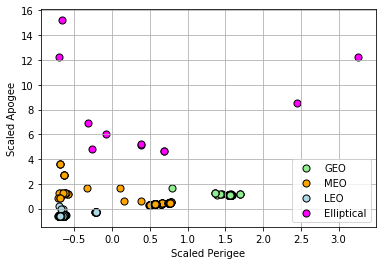

In [106]:
# plot K-means clustering using perigee and apogee as features
plt.scatter(
    x.iloc[y_km == 0, 0], x.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='GEO'
)

plt.scatter(
    x.iloc[y_km == 1, 0], x.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='MEO'
)

plt.scatter(
    x.iloc[y_km == 2, 0], x.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='o', edgecolor='black',
    label='LEO'
	)
	
plt.scatter(
    x.iloc[y_km == 3, 0], x.iloc[y_km == 3, 1],
    s=50, c='fuchsia',
    marker='o', edgecolor='black',
    label='Elliptical'
	)
	
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Scaled Perigee")
plt.ylabel("Scaled Apogee")
plt.show()